In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Vinit/Desktop/Retail-Business-Performance-Analysis/cleaned_data.csv")
df['order_date'] = pd.to_datetime(df['order_date'])

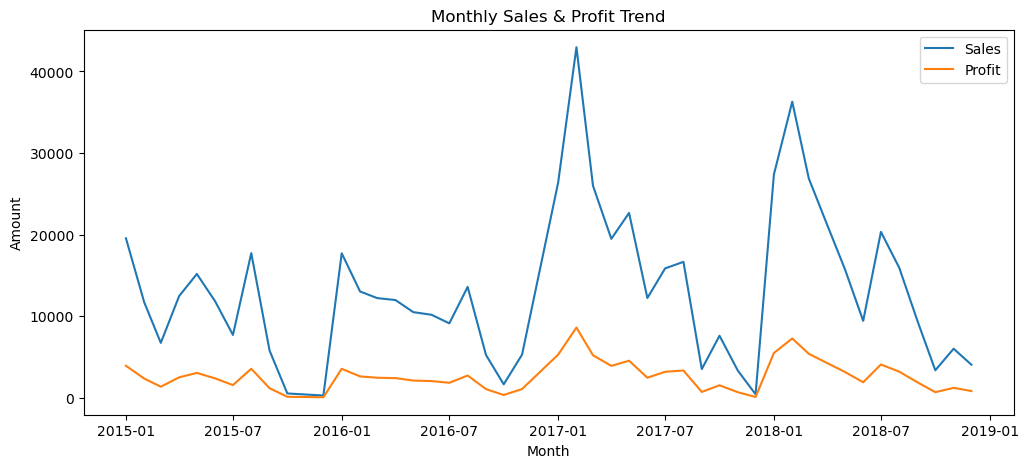

In [5]:
df['year_month'] = df['order_date'].dt.to_period('M')

monthly_perf = df.groupby('year_month').agg({'sales':'sum', 'profit':'sum'}).reset_index()

monthly_perf['year_month'] = monthly_perf['year_month'].dt.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_perf, x='year_month', y='sales', label='Sales')
sns.lineplot(data=monthly_perf, x='year_month', y='profit', label='Profit')
plt.title('Monthly Sales & Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()


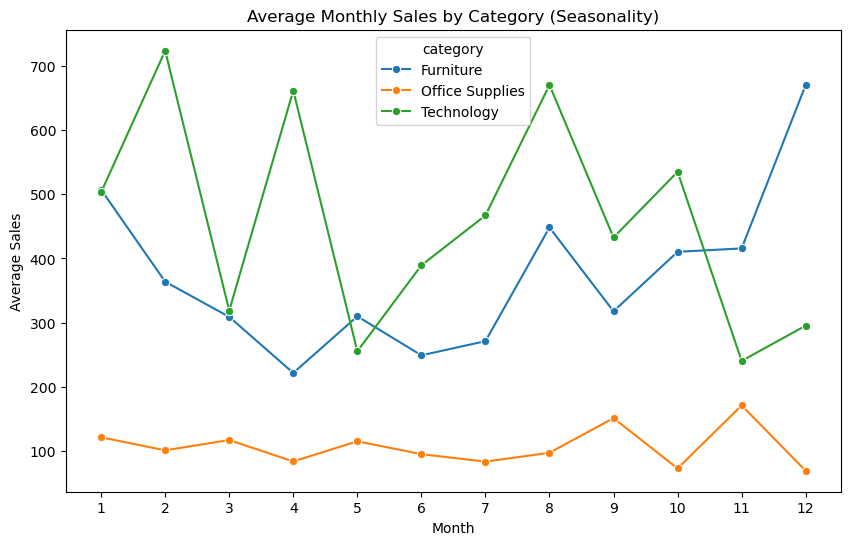

In [9]:
df['month'] = df['order_date'].dt.month

season_cat = df.groupby(['category', 'month']).agg({'sales':'mean'}).reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=season_cat, x='month', y='sales', hue='category', marker='o')
plt.title('Average Monthly Sales by Category (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1,13))
plt.show()


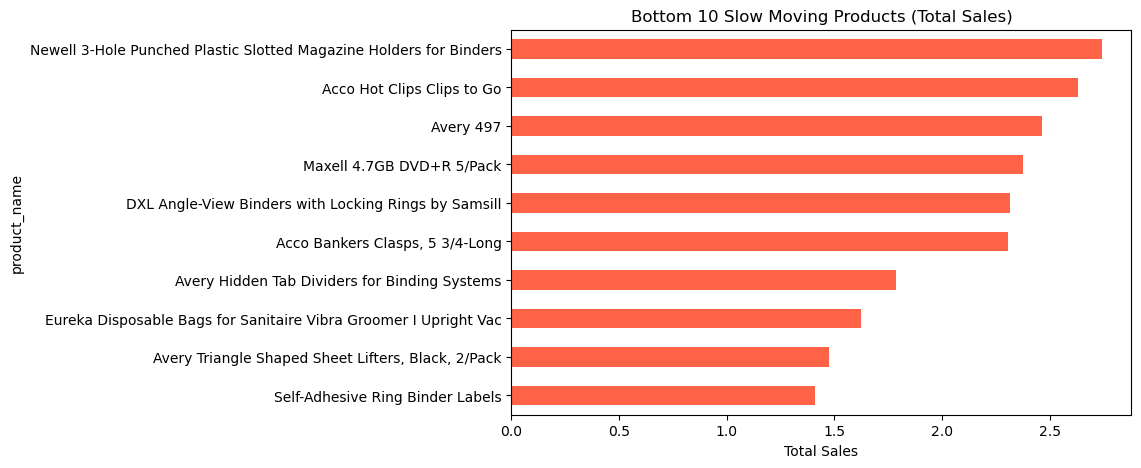

In [11]:
prod_sales = df.groupby('product_name')['sales'].sum().sort_values()

slow_movers = prod_sales.head(10)

plt.figure(figsize=(8,5))
slow_movers.plot(kind='barh', color='tomato')
plt.title('Bottom 10 Slow Moving Products (Total Sales)')
plt.xlabel('Total Sales')
plt.show()
